## Problems when building models

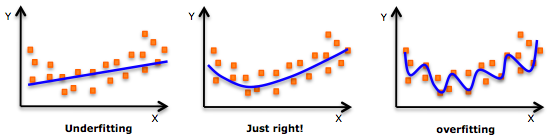

## Creating training and test sets
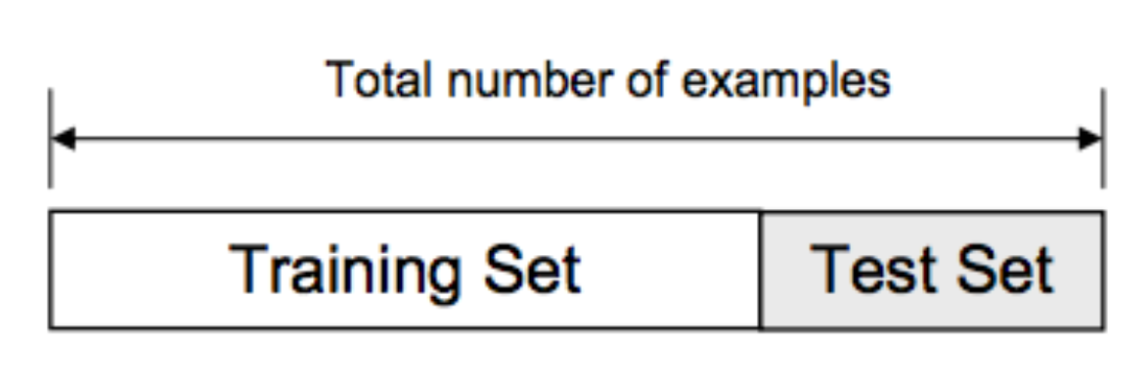

In [ ]:
# Importing libraries

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# We will use a dataset about diabetes included in the sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

diabetes = datasets.load_diabetes()

columns = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

df = pd.DataFrame(diabetes.data, columns=columns)

df.head()

In [ ]:
# The original form of the data

diabetes

In [ ]:
# Renaming columns if needed

df = df.rename(columns = {'age':'Age', 'sex': 'Gender'})

In [ ]:
# We can separate the target column as we will need it in the next steps

y = diabetes.target
y[:5]

In [ ]:
# We can create training and test set, with 20% of the data in the test set

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [ ]:
# Looking at the test part of the target variable
y_test

In [ ]:
# We can fit the model on the training set and make predictions for test set

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
# The result for test set

model.score(X_test, y_test)

In [ ]:
# We can also check the result for the training set
# In general, we expect better results for the training set

model.score(X_train, y_train)

In [ ]:
# We can visualize the predictions

sns.scatterplot(x = y_test, y = predictions)

## How to improve on using test set

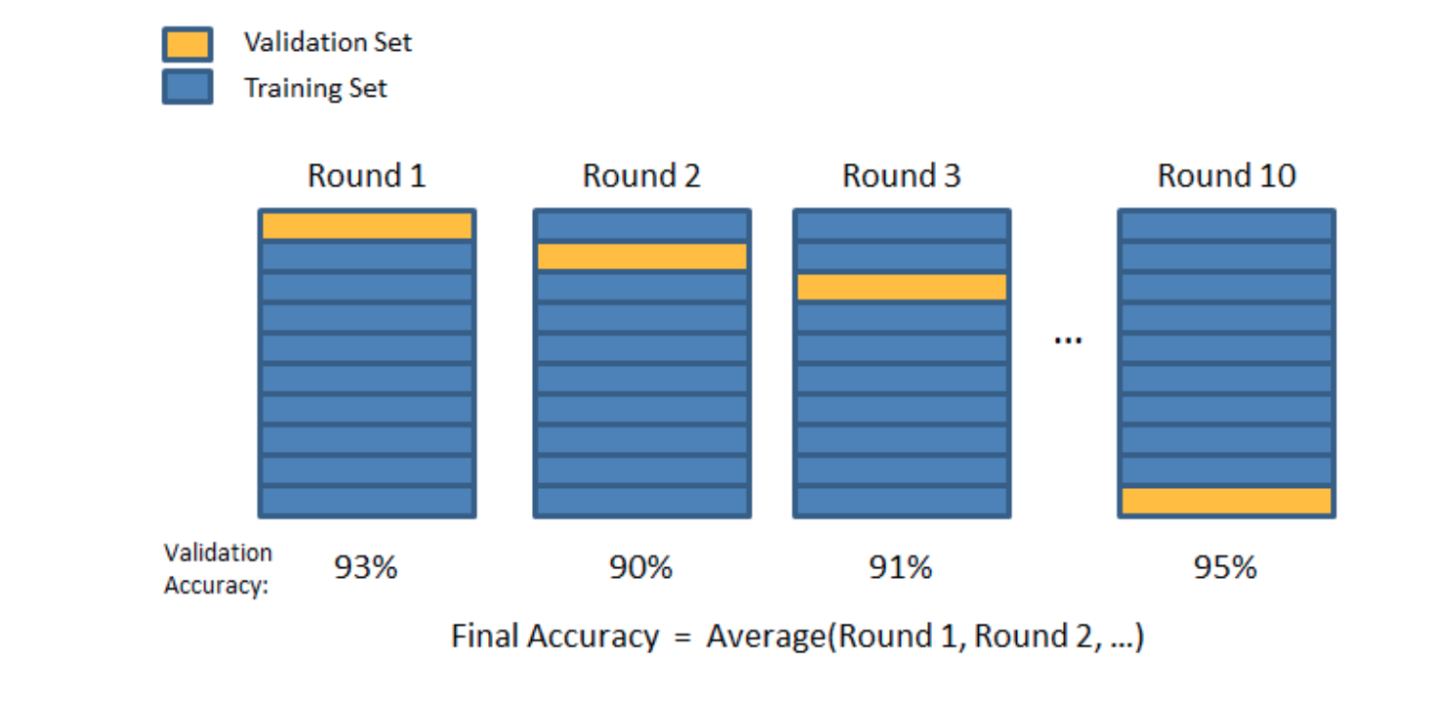

In [ ]:
# Importing required libraries

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Performing cross validation
# As we can see, we can obtain very different score values, depending on 
# how the data was separated, so it is important to check this
# as the result we have seen above using only one test set can 
# over or underestimate the actual performance

scores = cross_val_score(model, df, y, cv=10)
scores

In [ ]:
# Taking the average of the scores will provide a realistic estimation of the performance

scores.mean()

In [ ]:
# We can also make predictions with the model using the results of cross validation

predictions = cross_val_predict(model, df, y, cv=6)
sns.scatterplot(y, predictions)